In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/a.aundhkar7100@gmail.com/cinemaTicket_Ref.csv")

In [0]:
df1.show()

+---------+-----------+-----------+------------+-----------+---------+---------+------------------+----------+------------------+----------+-----+-------+---+
|film_code|cinema_code|total_sales|tickets_sold|tickets_out|show_time|occu_perc|      ticket_price|ticket_use|          capacity|      date|month|quarter|day|
+---------+-----------+-----------+------------+-----------+---------+---------+------------------+----------+------------------+----------+-----+-------+---+
|     1492|        304|    3900000|          26|          0|        4|     4.26|          150000.0|        26| 610.3286384976526|2018-05-05|    5|      2|  5|
|     1492|        352|    3360000|          42|          0|        5|     8.08|           80000.0|        42| 519.8019801980198|2018-05-05|    5|      2|  5|
|     1492|        489|    2560000|          32|          0|        4|     20.0|           80000.0|        32|             160.0|2018-05-05|    5|      2|  5|
|     1492|        429|    1200000|          1

In [0]:
df1.printSchema()

root
 |-- film_code: string (nullable = true)
 |-- cinema_code: string (nullable = true)
 |-- total_sales: string (nullable = true)
 |-- tickets_sold: string (nullable = true)
 |-- tickets_out: string (nullable = true)
 |-- show_time: string (nullable = true)
 |-- occu_perc: string (nullable = true)
 |-- ticket_price: string (nullable = true)
 |-- ticket_use: string (nullable = true)
 |-- capacity: string (nullable = true)
 |-- date: string (nullable = true)
 |-- month: string (nullable = true)
 |-- quarter: string (nullable = true)
 |-- day: string (nullable = true)



In [0]:
df1.describe().toPandas()

,summary,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,count,142524,142524,142524,142524,142524,142524,142399,142524,142524,142399,142524,142524,142524,142524
1,mean,1518.9851112795038,320.3784274929135,1.2347275407531364E7,140.13756981280346,0.23741264629115097,3.9321026634110745,19.96598634821867,81234.5998864962,139.90015716651232,854.7236051740435,None,6.776851617973113,2.6347211697678987,16.112584547163987
2,stddev,36.184450103504716,159.7012294147186,3.065485828936386E7,279.75873274364614,2.9232055587676697,3.0562758194745934,22.653445430740714,33236.59927804984,279.5649354881323,953.1181033636904,None,2.195843104896582,0.8096919058709409,8.949471151121177
3,min,1471,115,100000,1,0,1,0.0,10000.0,-1,-2.0,2018-02-21,10,1,1
4,max,1589,98,99990000,999,99,9,99.88,99999.9983361065,999,999.6056782334385,2018-11-04,9,4,9


In [0]:
from pyspark.sql.types import DateType
df1=df1.withColumn("film_code",df1.film_code.cast('int'))
df1=df1.withColumn("cinema_code",df1.cinema_code.cast('int')) 
df1=df1.withColumn("total_sales",df1.total_sales.cast('int')) 
df1=df1.withColumn("tickets_sold",df1.tickets_sold.cast('int')) 
df1=df1.withColumn("tickets_out",df1.tickets_out.cast('int')) 
df1=df1.withColumn("show_time",df1.show_time.cast('int')) 
df1=df1.withColumn("occu_perc",df1.occu_perc.cast('int')) 
df1=df1.withColumn("ticket_price",df1.ticket_price.cast('int')) 
df1=df1.withColumn("ticket_use",df1.ticket_use.cast('int')) 
df1=df1.withColumn("capacity",df1.capacity.cast('int')) 
df1=df1.withColumn("date",df1.date.cast(DateType()))
df1=df1.withColumn("month",df1.month.cast('int')) 
df1=df1.withColumn("quarter",df1.quarter.cast('int')) 
df1=df1.withColumn("day",df1.day.cast('int'))

In [0]:
df1.show()

+---------+-----------+-----------+------------+-----------+---------+---------+------------+----------+--------+----------+-----+-------+---+
|film_code|cinema_code|total_sales|tickets_sold|tickets_out|show_time|occu_perc|ticket_price|ticket_use|capacity|      date|month|quarter|day|
+---------+-----------+-----------+------------+-----------+---------+---------+------------+----------+--------+----------+-----+-------+---+
|     1492|        304|    3900000|          26|          0|        4|        4|      150000|        26|     610|2018-05-05|    5|      2|  5|
|     1492|        352|    3360000|          42|          0|        5|        8|       80000|        42|     519|2018-05-05|    5|      2|  5|
|     1492|        489|    2560000|          32|          0|        4|       20|       80000|        32|     160|2018-05-05|    5|      2|  5|
|     1492|        429|    1200000|          12|          0|        1|       11|      100000|        12|     108|2018-05-05|    5|      2|  5|

In [0]:
df1=df1.where(df1.date!='2018-02-21')
df1=df1.where(df1.date!='2018-02-23')

In [0]:
df1.where(df1.date=='2018-09-21').show()

+---------+-----------+-----------+------------+-----------+---------+---------+------------+----------+--------+----------+-----+-------+---+
|film_code|cinema_code|total_sales|tickets_sold|tickets_out|show_time|occu_perc|ticket_price|ticket_use|capacity|      date|month|quarter|day|
+---------+-----------+-----------+------------+-----------+---------+---------+------------+----------+--------+----------+-----+-------+---+
|     1556|        548|     200000|           8|          0|        1|        2|       25000|         8|     269|2018-09-21|    9|      3| 21|
+---------+-----------+-----------+------------+-----------+---------+---------+------------+----------+--------+----------+-----+-------+---+



In [0]:
df1.summary().toPandas()

,summary,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,count,142522,142522,142522,142522,142522,142522,142397,142522,142522,142397,142522,142522,142522
1,mean,1518.9857846507907,320.37614543719565,1.2347222675678141E7,140.13764190791596,0.23741597788411614,3.9321367929161815,19.487847356334754,81234.34893560293,139.90022593003187,854.2721756778584,6.776918651155611,2.6347441096813125,16.11250192952667
2,stddev,36.184257494826454,159.70113422180216,3.0655012099920798E7,279.7602580034531,2.923225934104172,3.056283109952371,22.66207829900441,33236.59453659277,279.5664591445816,953.1099425870383,2.195785597549199,0.8096744292263166,8.949505985486537
3,min,1471,32,20000,1,0,1,0,483,-219,-2,3,1,1
4,25%,1485,181,1260000,18,0,2,3,60000,18,276,5,2,8
5,50%,1498,324,3720000,50,0,3,10,79444,50,525,7,3,16
6,75%,1556,474,11100000,143,0,5,28,100000,143,1038,9,3,24
7,max,1589,637,1262819994,8499,311,60,147,700000,8499,9692,11,4,31


In [0]:

df2=df1.groupBy('date').sum('total_sales')
df1.groupBy("date").sum("total_sales").display()

date,sum(total_sales)
2018-08-10,14990894987
2018-05-28,3522814991
2018-03-17,3367302992
2018-06-26,5649075993
2018-09-09,3739479991
2018-08-08,7918147990
2018-10-05,11283699990
2018-11-02,9744695000
2018-09-01,3514239995
2018-08-11,5547329992


Databricks visualization. Run in Databricks to view.

In [0]:
df1.groupBy("cinema_code").sum("total_sales").display()

cinema_code,sum(total_sales)
496,1409790000
471,1318200000
463,560040000
243,3261120000
540,214500000
516,1254070000
251,654760000
451,408700000
458,31650000
481,653050000


Databricks visualization. Run in Databricks to view.

In [0]:
df1.groupBy("show_time").sum("total_sales").display()

show_time,sum(total_sales)
26,6253194960
12,57344521420
22,7528457428
1,60334984993
13,30919655886
6,228517085848
16,31516929459
3,215161094456
20,6889882984
5,140006695933


Databricks visualization. Run in Databricks to view.

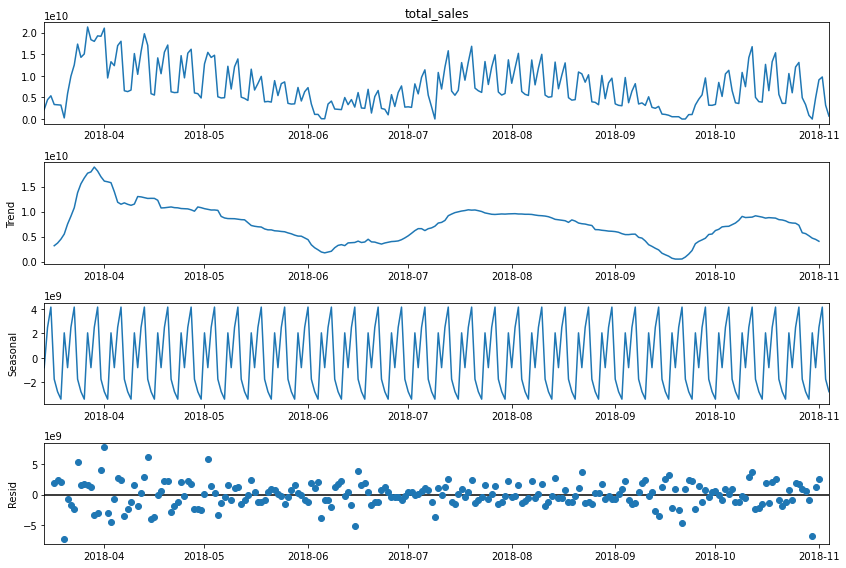

In [0]:
#converting dataframe to pandas for visualization
import pandas as pd
df2=df2.withColumnRenamed("sum(total_sales)","total_sales")
df1_pandas=df2.toPandas()
df1_pandas['date']=pd.to_datetime(df1_pandas['date'])
df1_pandas=df1_pandas.set_index('date')
idx=pd.date_range(start='2018-03-14',end='2018-11-04')
df1_pandas=df1_pandas.reindex(idx,fill_value=0)
df1_pandas["total_sales"]=df1_pandas['total_sales'].replace(to_replace=0,method='ffill')
df1_pandas.sort_index(inplace=True)


from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=12,8
decomposition=sm.tsa.seasonal_decompose(df1_pandas.total_sales,model='addictive')
fig=decomposition.plot()
fig.show()

In [0]:
df1_pandas.head()

,total_sales
2018-03-14,2202300484
2018-03-15,4479008974
2018-03-16,5386645987
2018-03-17,3367302992
2018-03-18,3298541496


In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.sql import functions as F

In [0]:
spark_df1_og=spark.createDataFrame(df1_pandas.rename_axis("date").reset_index())
spark_df1=spark_df1_og.filter((F.col("Date") >= "2018-03-14") & (F.col("Date") <= "2018-10-01"))
spark_df1=spark_df1_og.withColumn("date",spark_df1_og.date.cast(DateType()))
from pyspark.sql import functions as F

spark_df1 = spark_df1.withColumn("Date", F.unix_timestamp("Date").cast("double"))
spark_df1.display()


Date,total_sales
1.5209856E9,2202300484
1.521072E9,4479008974
1.5211584E9,5386645987
1.5212448E9,3367302992
1.5213312E9,3298541496
1.5214176E9,3232929498
1.521504E9,259605000
1.5215904E9,5901486491
1.5216768E9,9916534482
1.5217632E9,12527888982


In [0]:
#spark_df1 = spark_df1.withColumn("Date", unix_timestamp($"date", "dd-MM-yyyy"))

In [0]:
assembler = VectorAssembler(inputCols=["Date"], outputCol="features")
df = assembler.transform(spark_df1)

In [0]:
lr=LinearRegression(featuresCol='features',labelCol='total_sales')
model=lr.fit(df)

In [0]:
#df.show()

In [0]:
#predictions = model.transform(test_data)

In [0]:
'''from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="total_sales", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print("Mean Squared Error (MSE) on test data = {:.2f}".format(mse))'''

Out[22]: 'from pyspark.ml.evaluation import RegressionEvaluator\n\nevaluator = RegressionEvaluator(labelCol="total_sales", predictionCol="prediction", metricName="mse")\nmse = evaluator.evaluate(predictions)\nprint("Mean Squared Error (MSE) on test data = {:.2f}".format(mse))'

In [0]:

last_month_data = spark_df1_og.filter((F.col("Date") >= "2018-10-01") & (F.col("Date") <= "2018-11-04"))
last_month_data=last_month_data.withColumn("date",last_month_data.date.cast(DateType()))
last_month_data=last_month_data.withColumn("date",F.unix_timestamp("date").cast("double"))
last_month_data=last_month_data.withColumnRenamed("date","Date")

In [0]:
#last_month_data.display()

In [0]:
df = assembler.transform(last_month_data)
predictions=model.transform(df)

In [0]:
#predictions=predictions.drop(predictions.features)

In [0]:
#predictions.display()

In [0]:
#predictions_1=predictions.withColumn('Date',F.from_unixtime('Date').cast(DateType()))

In [0]:
#predictions_1.show()

In [0]:
#predictions_pandas=predictions_1.toPandas()
#predictions_pandas.head()

In [0]:
previous_month_data = spark_df1_og.filter((F.col("Date") >= "2018-03-14") & (F.col("Date") <= "2018-10-01"))
previous_month_data_pandas=previous_month_data.toPandas()

In [0]:
#predictions_pandas.set_index(predictions_pandas.columns[0],inplace=True)
previous_month_data_pandas.set_index(previous_month_data_pandas.columns[0],inplace=True)

In [0]:
'''import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(previous_month_data_pandas['total_sales'],label="Train")
plt.plot(predictions_pandas['total_sales'],label="Test")
plt.plot(predictions_pandas['prediction'],label='Predictions')
plt.legend(loc='best')
plt.title("Linear Regresssion")
plt.show()'''           

Out[33]: 'import matplotlib.pyplot as plt\nplt.figure(figsize=(20,6))\nplt.plot(previous_month_data_pandas[\'total_sales\'],label="Train")\nplt.plot(predictions_pandas[\'total_sales\'],label="Test")\nplt.plot(predictions_pandas[\'prediction\'],label=\'Predictions\')\nplt.legend(loc=\'best\')\nplt.title("Linear Regresssion")\nplt.show()'

In [0]:
#previous_month_data_pandas.head()

In [0]:
def run_model(model):
    predictions=model.transform(df)
    predictions=predictions.drop(predictions.features)
    predictions_1=predictions.withColumn('Date',F.from_unixtime('Date').cast(DateType()))
    predictions_pandas=predictions_1.toPandas()
    predictions_pandas.set_index(predictions_pandas.columns[0],inplace=True)
    return predictions_pandas

In [0]:
#predictions_pandas.head()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
results=pd.DataFrame()
def update_metrics(results,predictions_pandas,name_of_model):
    rmse = np.sqrt(mean_squared_error(predictions_pandas['total_sales'], predictions_pandas['prediction'])).round(2)
    mape = np.round(np.mean(np.abs(predictions_pandas['total_sales']-predictions_pandas['prediction'])/predictions_pandas['total_sales'])*100,2)
    score = r2_score(predictions_pandas["total_sales"], predictions_pandas["prediction"])*100

    tempResults = pd.DataFrame({'Method':[name_of_model], 'RMSE': [rmse],'MAPE': [mape],'R2 Score':[score] })
    results = pd.concat([results, tempResults])
    results = results[['Method', 'RMSE', 'MAPE','R2 Score']]
    return results



In [0]:
import matplotlib.pyplot as plt
def plot(predictions_pandas,name_of_model):
    plt.figure(figsize=(20,6))
    plt.plot(previous_month_data_pandas['total_sales'],label="Train")
    plt.plot(predictions_pandas['total_sales'],label="Test")
    plt.plot(predictions_pandas['prediction'],label='Predictions')
    plt.legend(loc='best')
    plt.title(name_of_model)
    plt.show()

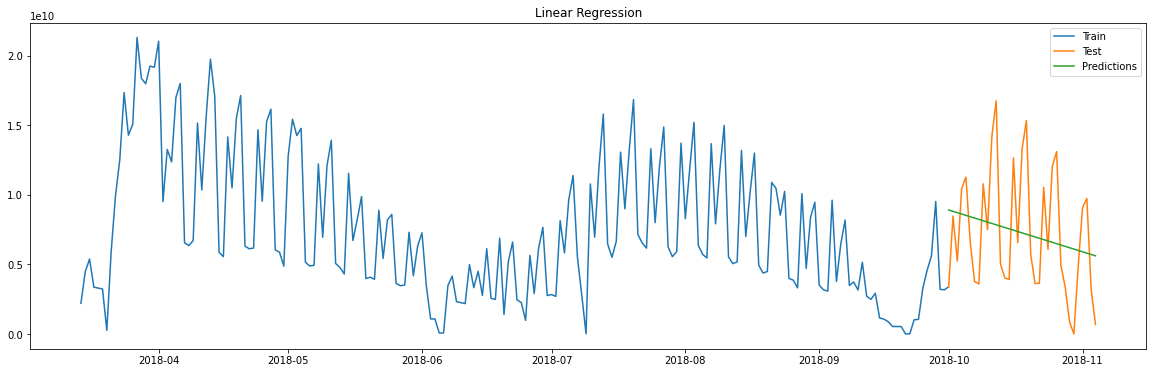

In [0]:
#Linear Regressor

from pyspark.ml.regression import LinearRegression
lr=LinearRegression(featuresCol='features',labelCol='total_sales')
model=lr.fit(df)

name_of_model='Linear Regression'
predictions_table=run_model(model)
results=update_metrics(results,predictions_table,name_of_model)
plot(predictions_table,name_of_model)

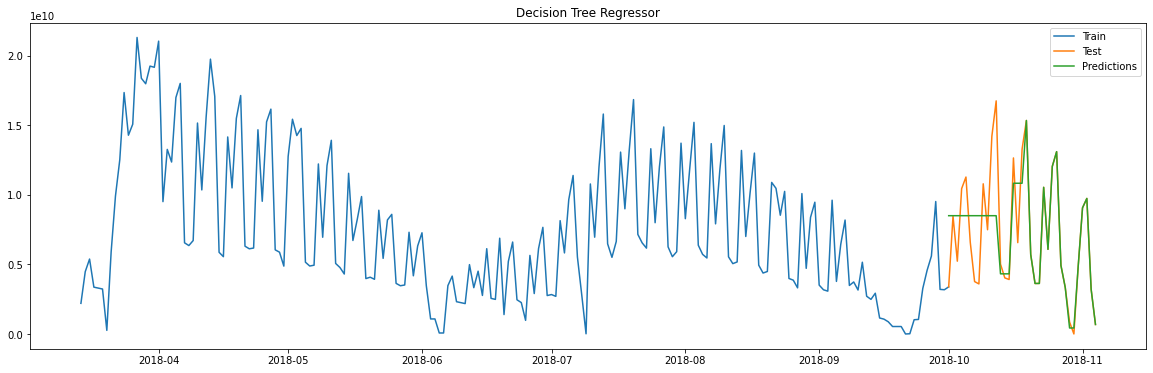

In [0]:
#decision Regressor
from pyspark.ml.regression import DecisionTreeRegressor
DTR=DecisionTreeRegressor(featuresCol='features',labelCol='total_sales')
model=DTR.fit(df)

name_of_model="Decision Tree Regressor"
predictions_table=run_model(model)
results=update_metrics(results,predictions_table,name_of_model)
plot(predictions_table,name_of_model)

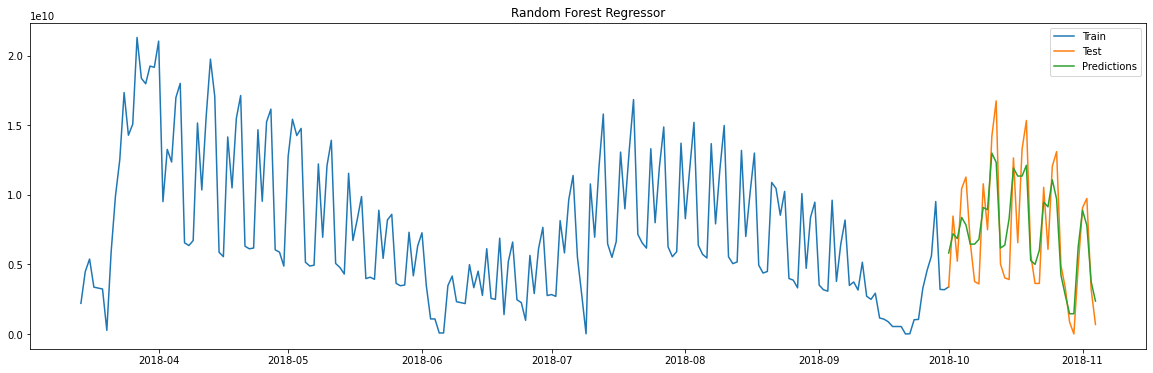

In [0]:
#Random Forest Regressor : 

from pyspark.ml.regression import RandomForestRegressor
RFR=RandomForestRegressor(featuresCol='features',labelCol='total_sales')
model=RFR.fit(df)

name_of_model="Random Forest Regressor"
predictions_table=run_model(model)
results=update_metrics(results,predictions_table,name_of_model)
plot(predictions_table,name_of_model)

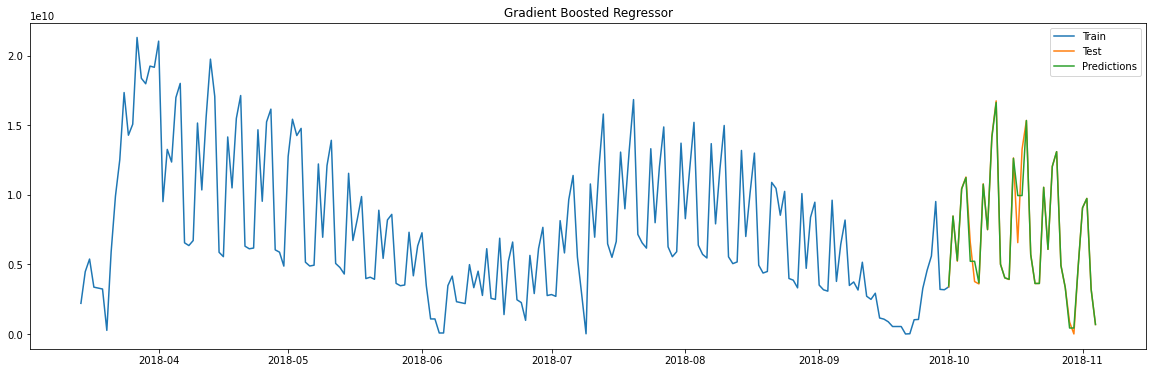

In [0]:
#Gradient Boosted Regressor

from pyspark.ml.regression import GBTRegressor
GBTR=GBTRegressor(featuresCol='features',labelCol='total_sales')
model=GBTR.fit(df)

name_of_model="Gradient Boosted Regressor"
predictions_table=run_model(model)
results=update_metrics(results,predictions_table,name_of_model)
plot(predictions_table,name_of_model)

In [0]:
results.head()

,Method,RMSE,MAPE,R2 Score
0,Linear Regression,4.262596e+09,8511.37,5.007542
0,Decision Tree Regressor,2.586958e+09,616.05,65.011964
0,Random Forest Regressor,2.245345e+09,2043.33,73.642325
0,Gradient Boosted Regressor,8.779847e+08,595.62,95.969911
